# Black Friday EDA and Feature Engineering 

# Cleaning and preparing the data for model training 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
dftrainn=pd.read_csv('trainn.csv')

In [5]:
dftrainn.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [6]:
dftrainn.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
dftrainn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [38]:
dftrainn.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
dftrainn.shape

(550068, 12)

Testt Dataset

In [10]:
dftestt = pd.read_csv('testt.csv')

In [11]:
dftestt.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


# 

Append the datasets

In [12]:
df = pd.concat([dftrainn, dftestt])

# append was removed after pandas 2.0

In [13]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [15]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


# 

Drop User_Id ,, axis=1 means column wise , o means row wise

In [16]:
df.drop(['User_ID'],axis=1,inplace=True)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# 

Preprocessing 🙏 

Categorical features -> Numerical

In [18]:
# Handling categorical feature Gender

In [19]:
# 1 
# df['Gender']=pd.get_dummies(df['Gender'])

In [20]:
# 2
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [21]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


.

In [22]:
# Handling categorical feature Age

In [23]:
df['Age']

0          0-17
1          0-17
2          0-17
3          0-17
4           55+
          ...  
233594    26-35
233595    26-35
233596    26-35
233597    46-50
233598    46-50
Name: Age, Length: 783667, dtype: object

In [24]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [25]:
# Lets rank, why not a good practice 

Target Ordinal Encoding

An ordinal encoding involves mapping each unique label to an integer value. This type of encoding is really only appropriate if there is a known relationship between the categories. This relationship does exist for some of the variables in our dataset, and ideally, this should be harnessed when preparing the data.

In [26]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

df['Age']

In [28]:
# 2
# Import label encoder 
# from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Age'. 
# df['Age']= label_encoder.fit_transform(df['Age']) 
  
# df['Age'].unique() 

In [29]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0


In [34]:
# Fixing City_Category categorical value into numerical value 

# 

In [43]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [47]:
# df_city=pd.get_dummies(df['City_Category'],drop_first=True)

dfcity=df['City_Category'].map({'A':0, 'C':2, 'B':1})

In [49]:
dfcity.head()

0    0
1    0
2    0
3    0
4    2
Name: City_Category, dtype: int64

In [45]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,3,15,B,4+,1,8,NaN,NaN,NaN
233595,P00254642,0,3,15,B,4+,1,5,8.0,NaN,NaN
233596,P00031842,0,3,15,B,4+,1,1,5.0,12.0,NaN
233597,P00124742,0,5,1,C,4+,0,10,16.0,NaN,NaN


In [50]:
df=pd.concat([df,dfcity],axis=1)

In [51]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,2


# 

In [56]:
df.drop('City_Category', axis=1, inplace=True)

KeyError: "['City_Category'] not found in axis"

In [58]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0


# 

Missing Values 

In [59]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [62]:
# Replace missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [65]:
# Discreate feature : Count ; Barchart; 
# Continuous Feature : Measure ; Histograms , scatterplots

Discrete data can only take on specific values. For example, you might count 20 cats at the animal shelter. These variables cannot have fractional or decimal values. You can have 20 or 21 cats, but not 20.5! Natural numbers have discrete values.

Continuous variables can assume any numeric value and can be meaningfully split into smaller parts. Consequently, they have valid fractional and decimal values. In fact, continuous data have an infinite number of potential values between any two points. Generally, you measure them using a scale.

In [66]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [67]:
# Replace the missing value with 
# mode ""
# mean ""
# median ""

In [77]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [71]:
# df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [72]:
# df['Product_Category_2'].mode()[0]

8.0

In [79]:
df['Product_Category_2'].isnull().sum()

0

In [80]:
# For Product_Category_3

In [82]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [83]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [84]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [86]:
df['Product_Category_3'].isnull().sum()

0

# 

In [88]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Product_Category1_2
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,8.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,6.0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,8.0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,14.0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,8.0


# for Stay_In_Current_City_Years

In [91]:
df['Stay_In_Current_City_Years'].unique()
#  '4+'

array(['2', '4+', '3', '1', '0'], dtype=object)

In [92]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [94]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [96]:
df['Stay_In_Current_City_Years'].head()

0    2
1    2
2    2
3    2
4    4
Name: Stay_In_Current_City_Years, dtype: object

In [104]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  Product_Category1_2         783667 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 71.7+ MB


In [105]:
# Convert object into integer

In [106]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  Product_Category1_2         783667 non-null  float64
dtypes: float64(4), int32(1), int64(5), object(1)
memory usage: 68.8+ MB


# 

Visualization

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


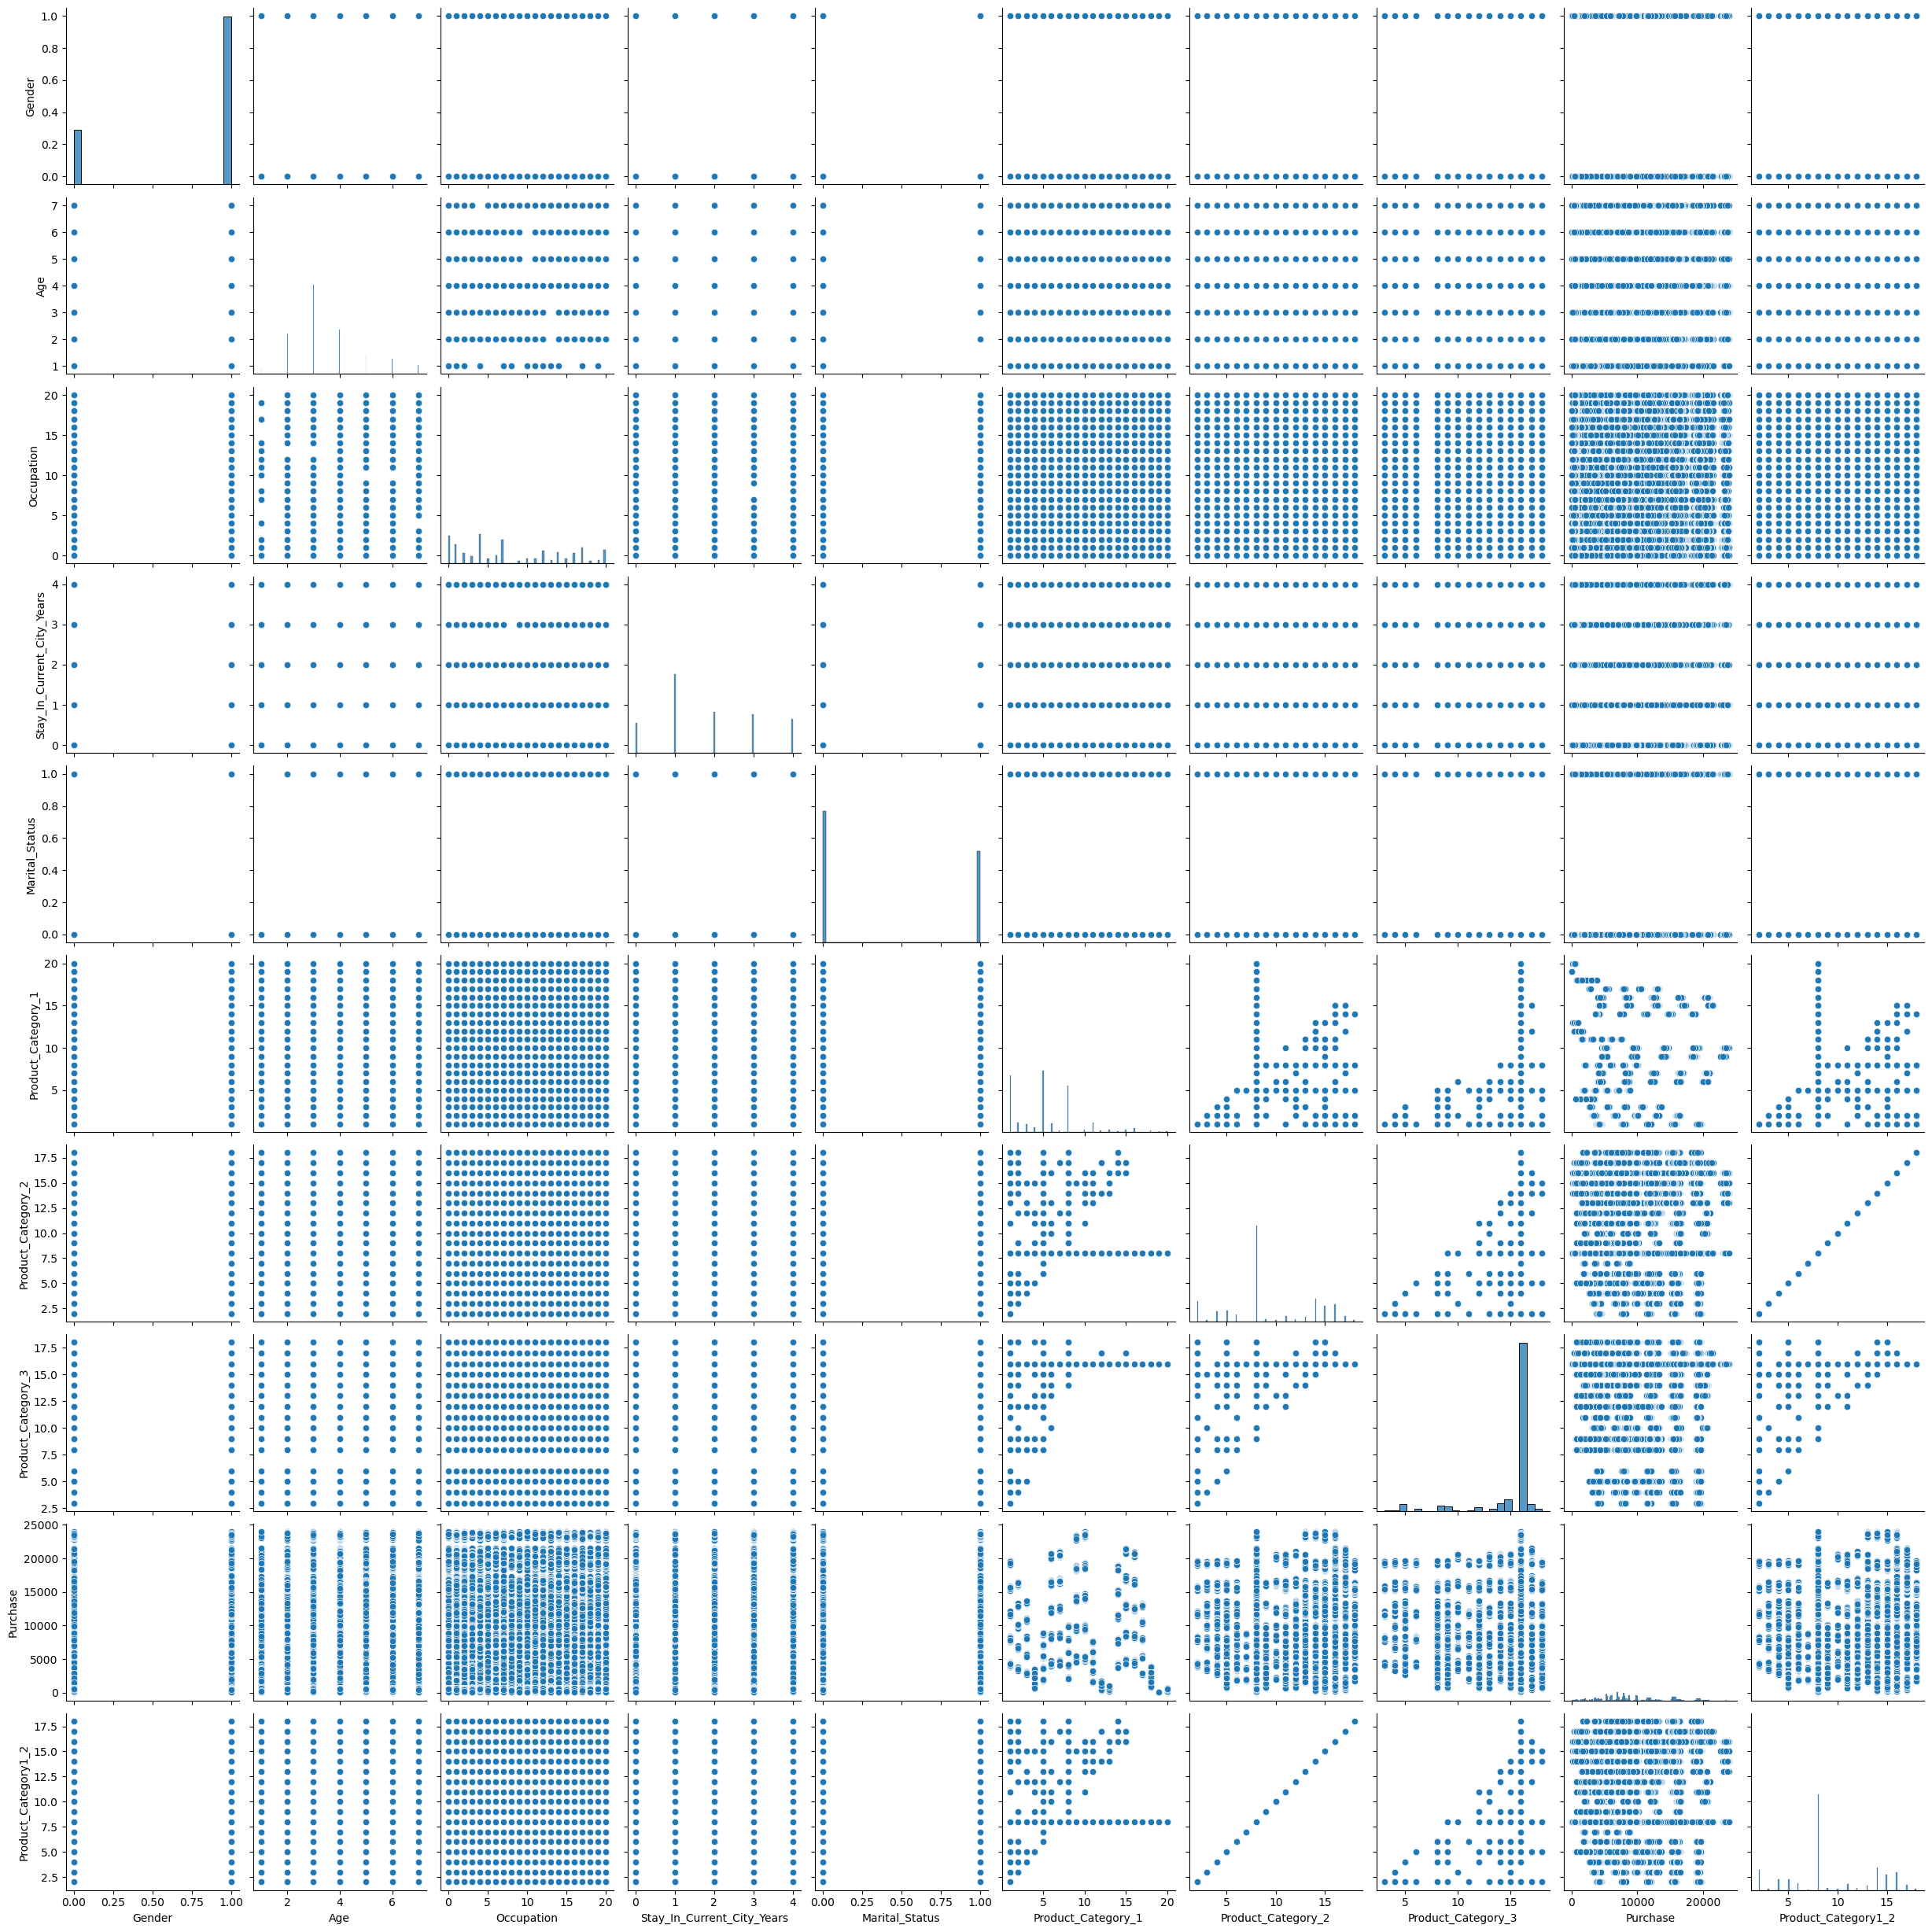

In [108]:
sns.pairplot(df)

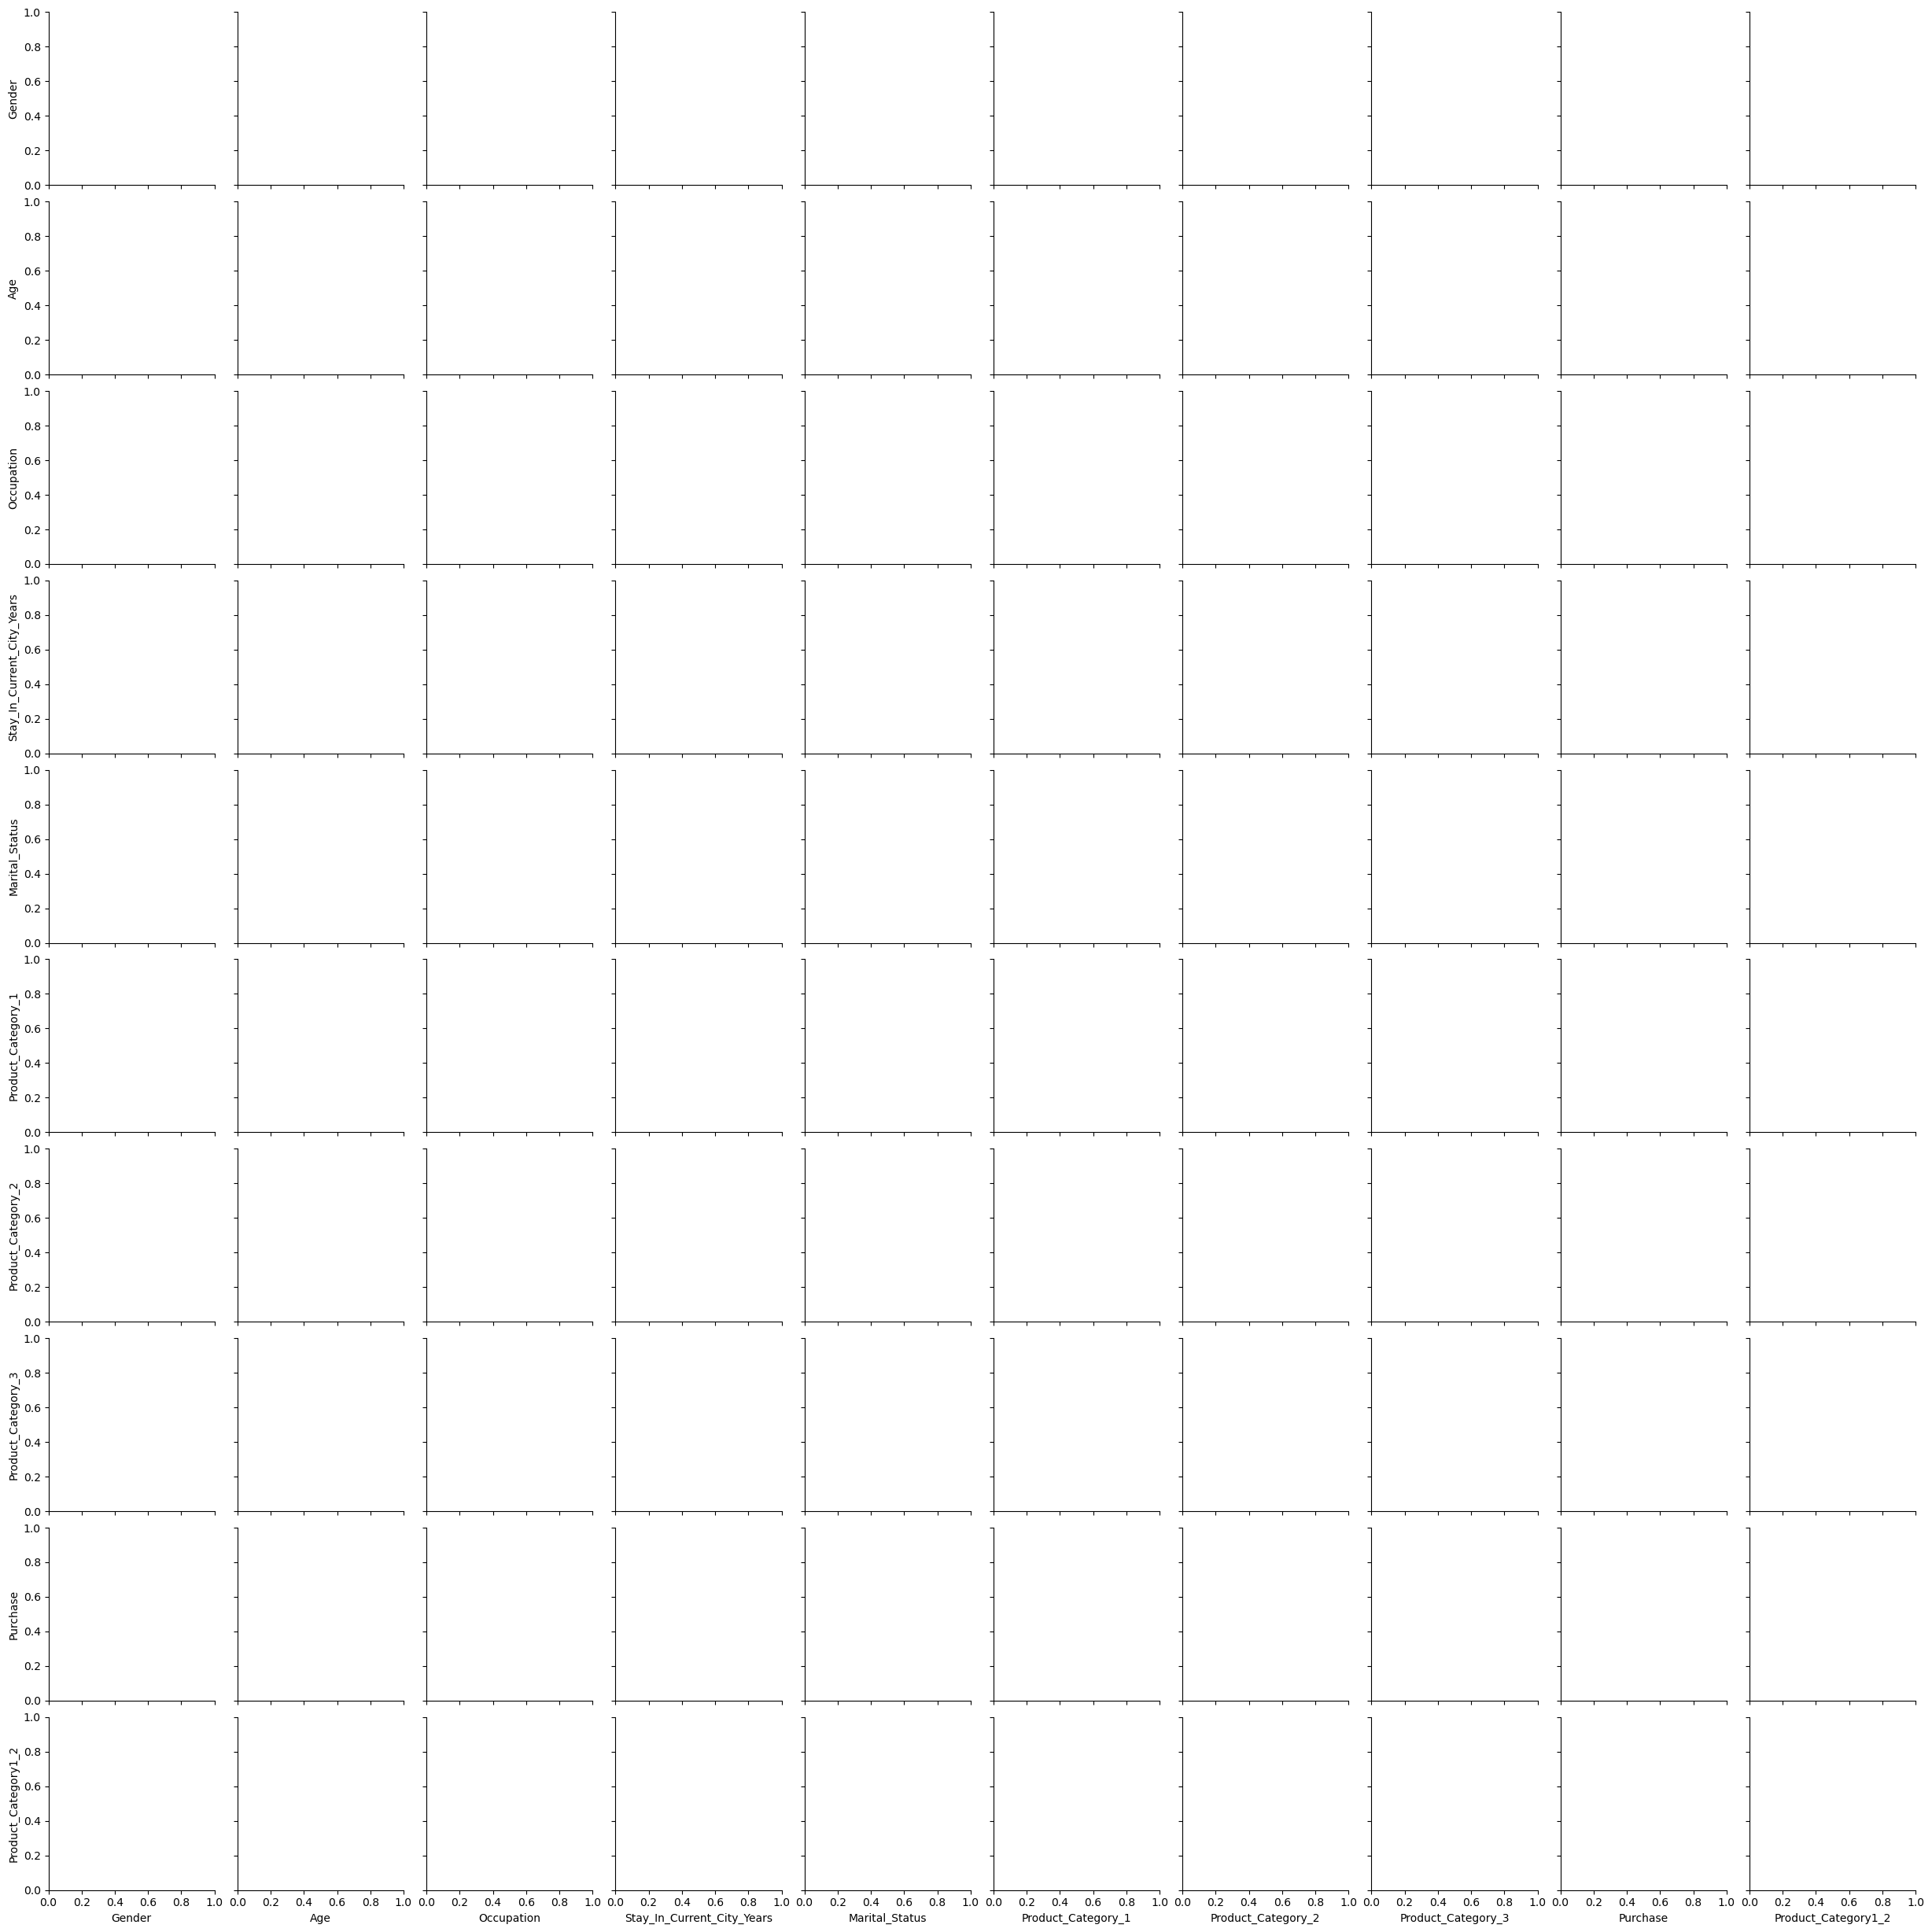

In [109]:
sns.PairGrid(df)

In [116]:
sns.Plot(df['Age', 'Purchase'], hue='Gender',data=df)

AttributeError: module 'seaborn' has no attribute 'Plot'

In [124]:
plt.barplot(df['Age'], df['Purchase'],hue='Gender')

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

<Axes: xlabel='Age', ylabel='Purchase'>

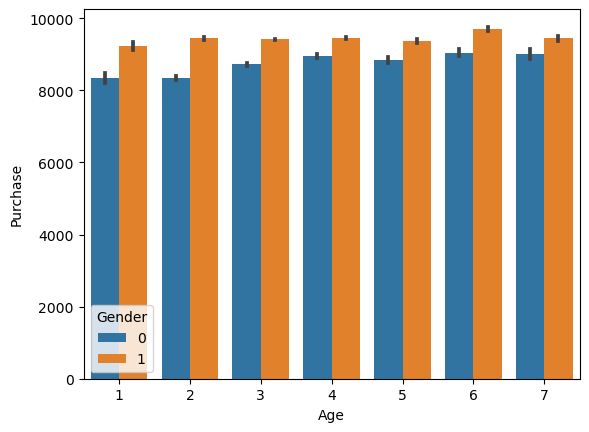

In [122]:
sns.barplot(df, x="Age", y="Purchase",hue='Gender')

Observation : Purchase of male is greater than Females. But as of age increases purchase stays almost same .

In [127]:
# Does Occupation affects purchase ? 

<Axes: xlabel='Occupation', ylabel='Purchase'>

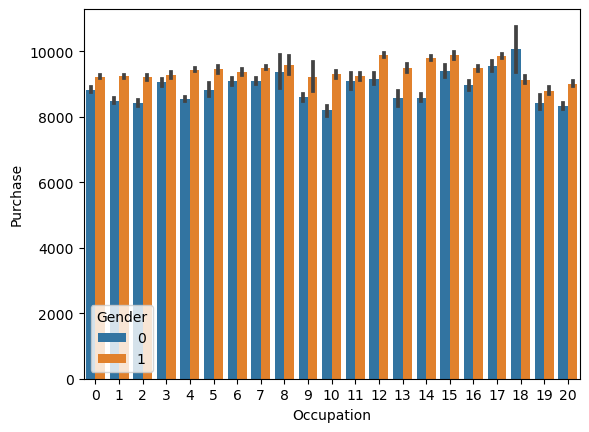

In [128]:
sns.barplot(df,x='Occupation',y='Purchase',hue='Gender')

Observation : Ocuupation does affects purchase on low level

In [140]:
# Product_category_1  *   Purchase  ---Gender

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

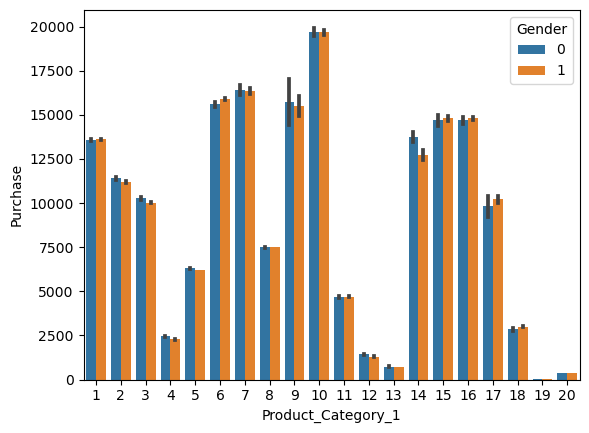

In [139]:
sns.barplot(df,x='Product_Category_1',y='Purchase',hue='Gender')

Observation : 

In [ ]:
# 

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

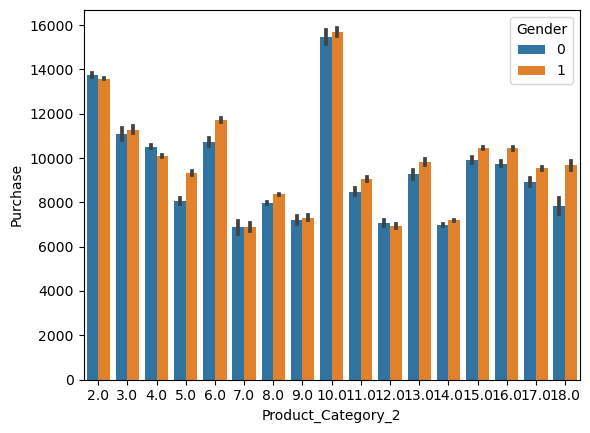

In [142]:
sns.barplot(df,x='Product_Category_2',y='Purchase',hue='Gender')

Observation : 

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

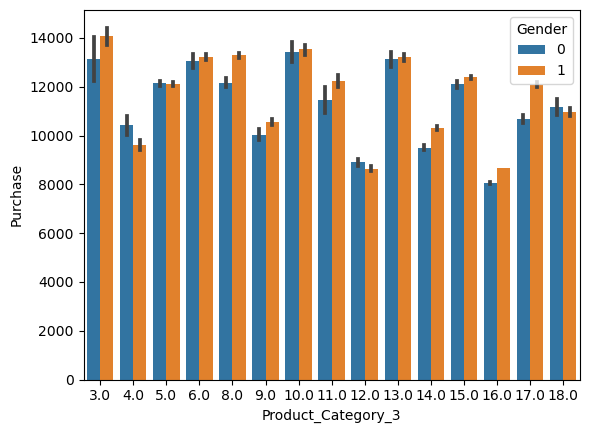

In [143]:
sns.barplot(df,x='Product_Category_3',y='Purchase',hue='Gender')

Observation : 

# Feature Scaling

In [147]:
dftestt=df[df['Purchase'].isnull()]

In [188]:
dftrainn=df[~df['Purchase'].isnull()]

In [189]:
X=dftrainn.drop('Purchase',axis=1)

In [190]:
X.head()
# X.shape

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Product_Category1_2
0,P00069042,0,1,10,2,0,3,8.0,16.0,8.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,6.0
2,P00087842,0,1,10,2,0,12,8.0,16.0,8.0
3,P00085442,0,1,10,2,0,12,14.0,16.0,14.0
4,P00285442,1,7,16,4,0,8,8.0,16.0,8.0


In [191]:
y=dftrainn['Purchase']

In [192]:
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [193]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train, y_test =train_test_split(X,y,test_size=0.33,random_state=42)

In [194]:
X_train.drop('Product_ID',axis=1,inplace=True)

In [195]:
X_test.drop('Product_ID',axis=1,inplace=True)

In [197]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)